# Resume Screening using Machine Learning
Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task

In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("UpdatedResumeDataSet.csv",encoding='utf-8')
data.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [85]:
print(f"Categories :\n {data['Category'].unique()}")

Categories :
 ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [86]:
data["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

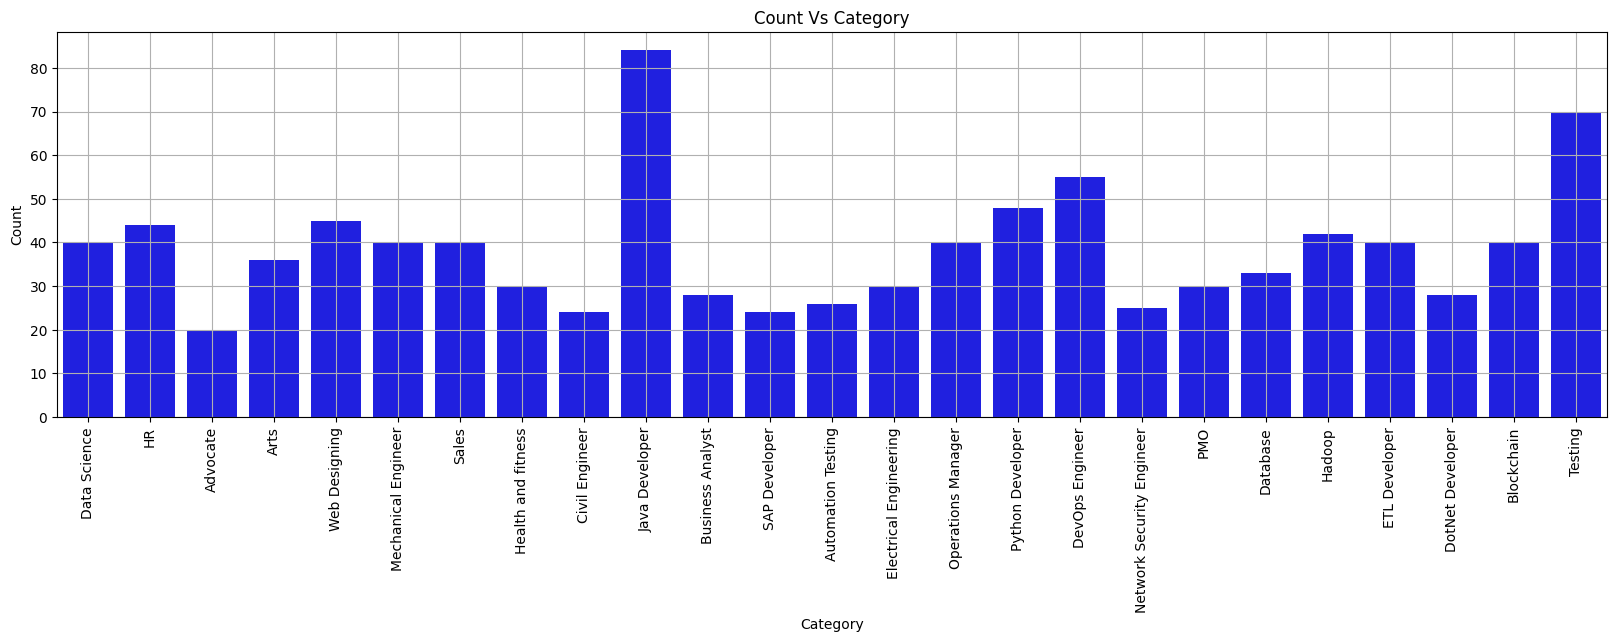

In [87]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x=data["Category"], data=data,color='b')
plt.title("Count Vs Category")
plt.xlabel('Category')
plt.ylabel('Count')
plt.plot
plt.grid()

In [88]:
print(f"Resume :\n {data['Resume'].unique()}")

Resume :
 ['Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud I

In [89]:
data.duplicated(subset=['Resume']).value_counts()

True     796
False    166
Name: count, dtype: int64

In [90]:
data[data.duplicated()==True]

,Category,Resume
10,Data Science,Skills * Programming Languages: Python (pandas...
11,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
12,Data Science,"Areas of Interest Deep Learning, Control Syste..."
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [91]:
data['CleanedResume']=''
data.head()

,Category,Resume,CleanedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [92]:
data.iloc[10]['Resume']

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [93]:
data[data['Resume']=='Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js']

,Category,Resume,CleanedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,
10,Data Science,Skills * Programming Languages: Python (pandas...,
20,Data Science,Skills * Programming Languages: Python (pandas...,
30,Data Science,Skills * Programming Languages: Python (pandas...,


In [94]:
data['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [95]:
data.drop_duplicates(subset=['Resume'],keep='first',inplace=True)
data.reset_index(inplace=True,drop=True)
data.head()

,Category,Resume,CleanedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       166 non-null    object
 1   Resume         166 non-null    object
 2   CleanedResume  166 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [97]:
import re
def cleanResume(text):
    text =re.sub('http\S+\s*',' ',text) # remove url
    text =re.sub('RT|cc',' ',text) # remove RT and cc
    text =re.sub('#\S+','',text) # remove hashtags
    text =re.sub('@\S+',' ',text) #remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    text = re.sub('\s+',' ',text) # remove extra whitespaces
    return text.strip()
data['CleanedResume']=data.Resume.apply(lambda x: cleanResume(x))

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mkpra\AppData\Local\Temp\ipykernel_18816\4260935728.py:3: SyntaxWarning: invalid escape sequence '\S'
  text =re.sub('http\S+\s*',' ',text) # remove url
C:\Users\mkpra\AppData\Local\Temp\ipykernel_18816\4260935728.py:5: SyntaxWarning: invalid escape sequence '\S'
  text =re.sub('#\S+','',text) # remove hashtags
C:\Users\mkpra\AppData\Local\Temp\ipykernel_18816\4260935728.py:6: SyntaxWarning: invalid escape sequence '\S'
  text =re.sub('@\S+',' ',text) #remove mentions
C:\Users\mkpra\App

In [98]:
data.head()

,Category,Resume,CleanedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [99]:
resumeData = data.copy()

In [100]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string



In [101]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mkpra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
onesetofStopwords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = data['Resume'].values
CleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    CleanedSentences += cleanedText
    requiredWords =nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in onesetofStopwords and word not in string.punctuation:
            totalWords.append(word)

wordFreqdist = nltk.FreqDist(totalWords)
mostcommon = wordFreqdist.most_common(50)
print(mostcommon)

[('Exprience', 616), ('company', 520), ('months', 515), ('Details', 510), ('description', 458), ('1', 348), ('Project', 299), ('data', 242), ('project', 231), ('6', 227), ('Maharashtra', 217), ('year', 215), ('SQL', 215), ('team', 207), ('Less', 199), ('using', 197), ('January', 189), ('Skill', 175), ('Management', 167), ('Ltd', 159), ('Pune', 158), ('C', 151), ('Education', 144), ('management', 143), ('Data', 140), ('Developer', 137), ('Engineering', 134), ('database', 133), ('Java', 130), ('Database', 127), ('monthsCompany', 125), ('System', 123), ('University', 123), ('Server', 123), ('Pvt', 122), ('India', 120), ('like', 118), ('The', 117), ('Responsibilities', 117), ('various', 116), ('A', 113), ('business', 113), ('2', 113), ('development', 112), ('reports', 111), ('application', 110), ('issues', 106), ('system', 106), ('Mumbai', 106), ('Test', 105)]


In [103]:
wordFreqdist.most_common(50)

[('Exprience', 616),
 ('company', 520),
 ('months', 515),
 ('Details', 510),
 ('description', 458),
 ('1', 348),
 ('Project', 299),
 ('data', 242),
 ('project', 231),
 ('6', 227),
 ('Maharashtra', 217),
 ('year', 215),
 ('SQL', 215),
 ('team', 207),
 ('Less', 199),
 ('using', 197),
 ('January', 189),
 ('Skill', 175),
 ('Management', 167),
 ('Ltd', 159),
 ('Pune', 158),
 ('C', 151),
 ('Education', 144),
 ('management', 143),
 ('Data', 140),
 ('Developer', 137),
 ('Engineering', 134),
 ('database', 133),
 ('Java', 130),
 ('Database', 127),
 ('monthsCompany', 125),
 ('System', 123),
 ('University', 123),
 ('Server', 123),
 ('Pvt', 122),
 ('India', 120),
 ('like', 118),
 ('The', 117),
 ('Responsibilities', 117),
 ('various', 116),
 ('A', 113),
 ('business', 113),
 ('2', 113),
 ('development', 112),
 ('reports', 111),
 ('application', 110),
 ('issues', 106),
 ('system', 106),
 ('Mumbai', 106),
 ('Test', 105)]

In [104]:
from sklearn.preprocessing import LabelEncoder

var = ['Category']
le =LabelEncoder()
for i in  var:
    data[i] =le.fit_transform(data[i])

In [105]:
data.head(10)

,Category,Resume,CleanedResume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skills Python Tableau Data Visualization R Stu...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,Education Details B Tech Rayat and Bahra Insti...
8,6,Personal Skills â¢ Ability to quickly grasp t...,Personal Skills Ability to quickly grasp techn...
9,6,Expertise â Data and Quantitative Analysis â...,Expertise Data and Quantitative Analysis Decis...


In [106]:
data.Category.value_counts()

Category
15    13
7     11
6     10
0     10
12    10
9      7
13     7
8      7
2      7
23     7
5      6
4      6
21     6
14     6
20     6
1      6
11     5
22     5
17     5
16     5
10     5
3      5
18     4
24     4
19     3
Name: count, dtype: int64

In [107]:
resumeData.Category.value_counts()

Category
Java Developer               13
Database                     11
Data Science                 10
Advocate                     10
HR                           10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
Web Designing                 4
PMO                           3
Name: count, dtype: int64

In [108]:
del resumeData

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = data['CleanedResume'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
wordFeatures = word_vectorizer.fit_transform(requiredText)

print("Feature extraction completed .......")

X_train, X_test, y_train, y_test = train_test_split(
    wordFeatures, requiredTarget,
    test_size=0.2, random_state=42,
    shuffle=True, stratify=requiredTarget
)


Feature extraction completed .......


In [110]:
X_train.shape

(132, 7351)

In [111]:
X_test.shape

(34, 7351)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

In [115]:
print(f"Train Accuracy : {clf.score(X_train,y_train)}")
print(f"Test Accuracy : {clf.score(X_test,y_test)}")

Train Accuracy : 0.8560606060606061
Test Accuracy : 0.7647058823529411


c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")


In [117]:
from sklearn.metrics import classification_report
print(f"classification_report :\n {classification_report(y_train,clf.predict(X_train))}")

classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.80      0.89         5
           2       0.62      0.83      0.71         6
           3       1.00      1.00      1.00         4
           4       0.83      1.00      0.91         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         8
           7       0.82      1.00      0.90         9
           8       0.67      0.33      0.44         6
           9       0.62      1.00      0.77         5
          10       1.00      1.00      1.00         4
          11       0.57      1.00      0.73         4
          12       1.00      0.75      0.86         8
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.82      0.90      0.86        10
          16       1.00      0.75      0.86         4
  

c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [118]:
print(f"classification_report :\n {classification_report(y_test,prediction)}")

classification_report :
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       0.25      1.00      0.40         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         1
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         1
  

c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\mkpra\miniforge3\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique clas

In [120]:
# Save trained model
import pickle
with open("resume_model.pkl", "wb") as f:
    pickle.dump(clf, f)

# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(word_vectorizer, f)
